# Bayesian parameter estimation for low-dimensional examples


The Bayesian procedures available in RAT ([Nested Sampler (NS)](https://en.wikipedia.org/wiki/Nested_sampling_algorithm) and [DREAM](https://doi.org/10.1016/j.envsoft.2015.08.013)) estimate the parameters of our reflectivity model - that is, they find the maximum value of 
$$P((X_1, X_2, ...) = (x_1, x_2, ...) | I)$$
where $P$ is a probability measure, $X_1, X_2, ...$ are our parameters, $x_1, x_2, ...$ are proposed values of these parameters, and $I$ is our background information on the model (e.g. our data), over a range of values of $x_1, x_2, ...$ between given minimum and maximum values. It can be shown that under some weak assumptions about our data, this probability is proportional to $\exp(-\chi^2/2)$, where $\chi^2$ is the chi-squared measure of fit given by the least-squares solution. [1]

If we want to calculate $\chi^2$ directly for a sample of $N$ values between some given minimum and maximum values for each parameter, we would have to perform $N^P$ calculations, where $P$ is the number of parameters. Of course, for large numbers of parameters, this is infeasible, hence why algorithms such as NS and DREAM have been developed to do so more efficiently. However, for a small number of parameters, it is feasible for us to perform this direct calculation and compare it to the results of NS and DREAM. Here we will do so for an example of 2 and 3 parameters.

*[1] D. S. Sivia, J. R. P. Webster,
    "The Bayesian approach to reflectivity data",
    Physica B: Condensed Matter,
    Volume 248, June 1998, pages 327-337  
    DOI: 10.1016/S0921-4526(98)00259-2  
    URL: https://bayes.wustl.edu/sivia/98_20feb03.pdf*

## Two-parameter example
We will start with a two-dimensional example on a simple project. This project represents a bare D2O substrate, and we will estimate the true values of the substrate roughness and background signal for this project.

In [1]:
import numpy as np

import RATapi as RAT
from RATapi.models import Parameter, Background, Resolution, Data, Contrast

/home/alexhroom/Code/Python/python-RAT/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project = RAT.Project(
        name="Bare D2O Substrate",
        calculation="normal",
        model="standard layers",
        geometry="air/substrate",
        absorption="False",
        parameters=[Parameter(name="Substrate Roughness", min=3.0, value=4.844363132849221, max=8.0, fit=True)],
        background_parameters=[
            Parameter(name="Background parameter 1", min=5e-08, value=3.069003361230152e-06, max=7e-06, fit=True)
        ],
        scalefactors=[Parameter(name="Scalefactor 1", min=0.07, value=0.10141560336360426, max=0.13, fit=False)],
        bulk_in=[Parameter(name="Air", min=0.0, value=0.0, max=0.0, fit=False)],
        bulk_out=[Parameter(name="D2O", min=6.3e-06, value=6.35e-06, max=6.4e-06, fit=False)],
        resolution_parameters=[Parameter(name="Resolution parameter 1", min=0.01, value=0.03, max=0.05, fit=False)],
        backgrounds=[Background(name="Background 1", type="constant", value_1="Background parameter 1")],
        resolutions=[Resolution(name="Resolution 1", type="constant", value_1="Resolution parameter 1")],
        data=[
            Data(name="Simulation", data=np.empty([0, 3]), simulation_range=[0.005, 0.7]),
            Data(
                name="f82395c",
                data=np.array(
                    [
                        [4.8866e-02, 1.2343e-04, 1.3213e-06],
                        [5.1309e-02, 1.0063e-04, 1.0803e-06],
                        [5.3874e-02, 8.2165e-05, 8.8779e-07],
                        [5.6568e-02, 6.4993e-05, 7.2018e-07],
                        [5.9396e-02, 5.3958e-05, 6.0015e-07],
                        [6.2366e-02, 4.3590e-05, 5.0129e-07],
                        [6.5485e-02, 3.5780e-05, 4.1957e-07],
                        [6.8759e-02, 2.9130e-05, 3.5171e-07],
                        [7.2197e-02, 2.3481e-05, 3.0586e-07],
                        [7.5807e-02, 1.8906e-05, 2.6344e-07],
                        [7.9597e-02, 1.4642e-05, 2.2314e-07],
                        [8.3577e-02, 1.1589e-05, 1.8938e-07],
                        [8.7756e-02, 9.5418e-06, 1.6220e-07],
                        [9.2143e-02, 7.5694e-06, 1.3809e-07],
                        [9.6751e-02, 6.3831e-06, 1.2097e-07],
                        [1.0159e-01, 5.0708e-06, 1.0333e-07],
                        [1.0667e-01, 4.1041e-06, 8.9548e-08],
                        [1.1200e-01, 3.4253e-06, 7.9830e-08],
                        [1.1760e-01, 2.8116e-06, 7.1554e-08],
                        [1.2348e-01, 2.3767e-06, 6.3738e-08],
                        [1.2966e-01, 1.9241e-06, 5.6586e-08],
                        [1.3614e-01, 1.5642e-06, 5.2778e-08],
                        [1.4294e-01, 1.2922e-06, 4.9730e-08],
                        [1.5009e-01, 1.1694e-06, 5.1175e-08],
                        [1.5760e-01, 9.7837e-07, 5.0755e-08],
                        [1.6548e-01, 8.9138e-07, 5.3542e-08],
                        [1.7375e-01, 7.9420e-07, 5.4857e-08],
                        [1.8244e-01, 7.9131e-07, 5.8067e-08],
                        [1.9156e-01, 6.5358e-07, 5.7717e-08],
                        [2.0114e-01, 6.2970e-07, 5.7951e-08],
                        [2.1119e-01, 5.0130e-07, 5.5262e-08],
                        [2.2175e-01, 5.0218e-07, 5.6461e-08],
                        [2.3284e-01, 3.9299e-07, 5.0685e-08],
                        [2.4448e-01, 3.5324e-07, 5.0194e-08],
                        [2.5671e-01, 4.4475e-07, 5.6485e-08],
                        [2.6954e-01, 5.1338e-07, 6.2247e-08],
                        [2.8302e-01, 3.4918e-07, 4.9745e-08],
                        [2.9717e-01, 4.3037e-07, 5.5488e-08],
                        [3.1203e-01, 4.0099e-07, 5.3591e-08],
                        [3.2763e-01, 3.8397e-07, 5.1303e-08],
                        [3.4401e-01, 3.0995e-07, 4.5965e-08],
                        [3.6121e-01, 3.9357e-07, 5.0135e-08],
                        [3.7927e-01, 3.0997e-07, 4.3680e-08],
                        [3.9824e-01, 2.9656e-07, 4.2432e-08],
                        [4.1815e-01, 2.1909e-07, 3.6117e-08],
                        [4.3906e-01, 2.3153e-07, 3.6307e-08],
                        [4.6101e-01, 3.3428e-07, 4.3874e-08],
                        [4.8406e-01, 2.3441e-07, 3.7488e-08],
                        [5.0826e-01, 1.5496e-07, 3.0585e-08],
                        [5.3368e-01, 2.4708e-07, 3.9376e-08],
                        [5.6036e-01, 2.2157e-07, 3.8258e-08],
                        [5.8838e-01, 2.2798e-07, 4.6976e-08],
                        [6.1169e-01, 6.0272e-07, 2.3239e-07],
                    ]
                ),
                data_range=[0.048866, 0.61169],
                simulation_range=[0.048866, 0.61169],
            ),
        ],
        contrasts=[
            Contrast(
                name="Chain-d, acmw",
                data="f82395c",
                background="Background 1",
                background_action="add",
                bulk_in="Air",
                bulk_out="D2O",
                scalefactor="Scalefactor 1",
                resolution="Resolution 1",
                resample=False,
                model=[],
            )
        ],
    )

Firstly, we will run calculations using nested sampling and DREAM.

In [3]:
ns_controls = RAT.Controls(procedure="ns", nsTolerance=1, nLive=500, display="final")
_, ns_results = RAT.run(project, ns_controls)

dream_controls = RAT.Controls(procedure="dream", display="final")
_, dream_results = RAT.run(project, dream_controls)

Starting RAT ───────────────────────────────────────────────────────────────────────────────────────────────────────────


Running Nested Sampler

log(Z): -7.16104e+01, tol = 6.98054e+01, K = 1, iteration = 1, H = -nan
log(Z): -7.06250e+01, tol = 6.88180e+01, K = 1, iteration = 2, H = 3.23599e+00
log(Z): -6.94628e+01, tol = 6.76538e+01, K = 1, iteration = 3, H = 4.66504e+00
log(Z): -6.88422e+01, tol = 6.70312e+01, K = 1, iteration = 4, H = 4.69445e+00
log(Z): -6.39816e+01, tol = 6.21686e+01, K = 1, iteration = 5, H = 6.16640e+00
log(Z): -6.29837e+01, tol = 6.11687e+01, K = 1, iteration = 6, H = 5.54555e+00
log(Z): -6.21650e+01, tol = 6.03481e+01, K = 1, iteration = 7, H = 5.24064e+00
log(Z): -6.09968e+01, tol = 5.91778e+01, K = 1, iteration = 8, H = 5.30228e+00
log(Z): -5.93002e+01, tol = 5.74792e+01, K = 1, iteration = 9, H = 5.58492e+00
log(Z): -5.84434e+01, tol = 5.66204e+01, K = 1, iteration = 10, H = 5.27649e+00
log(Z): -5.77264e+01, tol = 5.59014e+01, K = 1, iteration = 11, H = 5

DREAM: 100%|██████████████████████████████████████████████████████████████████████████████


Elapsed time is 1.067 seconds

Finished RAT ───────────────────────────────────────────────────────────────────────────────────────────────────────────



Now we will perform our direct calculation. The standard `'calculate'` procedure in RAT runs an Abelès calculation for the reflectivity of our model, and calculates the $\chi^2$ statistic for how well this reflectivity fits the given data. We will take a sample of 30 values between the minimum and maximum value of our roughness and background parameters, and calculate $\exp(-\chi^2 / 2)$ on this roughness-background grid. 

In [4]:
rough_param = project.parameters[0]
roughness = np.linspace(rough_param.min, rough_param.max, 30)

back_param = project.background_parameters[0]
background = np.linspace(back_param.min, back_param.max, 30)

controls = RAT.Controls(procedure="calculate", calcSldDuringFit=True, display="off")

# function to calculate exp(-chi_squared / 2) for a given pair of roughness/background values
def calculate_posterior(roughness_index: int, background_index: int) -> float:
    """Calculate the posterior for an item in the roughness and background vectors.

    Parameters
    ----------
    roughness_index : int
        The index of the roughness vector to use as the roughness parameter value.
    background_index : int
        The index of the background vector to use as the background parameter value.

    Returns
    -------
    float
        The value of exp(-chi^2 / 2) for the given roughness and background values.
    """
    project.parameters[0].value = roughness[roughness_index]
    project.background_parameters[0].value = background[background_index]

    _, results = RAT.run(project, controls)
    chi_squared = results.calculationResults.sumChi

    return np.exp(-chi_squared / 2)

# we vectorise the calculation to make it faster by running it over a matrix of indices (x, y)
vectorized_calc_posterior = np.vectorize(calculate_posterior)
probability_array = vectorized_calc_posterior(*np.indices((30, 30), dtype=int))

We can get the parameter values that best fit our model for each method:

In [5]:
# get the vector indices that produced the lowest chi-squared
best_indices = np.unravel_index(np.argmax(probability_array, axis=None), probability_array.shape)
print("Best values according to direct calculation:\n",
      "Roughness: ", roughness[best_indices[0]], "\n",
      "Background: ", background[best_indices[1]])

print("Best values according to Nested Sampler:\n",
      "Roughness: ", ns_results.fitParams[0], "\n",
      ## FIXME: once fitParams outputs properly!
)#      "Background: ", ns_results.fitParams[1])

print("Best values according to DREAM:\n",
      "Roughness: ", dream_results.fitParams[0], "\n",
      ## FIXME: once fitParams outputs properly!
      )#      "Background: ", dream_results.fitParams[1])

Best values according to direct calculation:
 Roughness:  4.896551724137931 
 Background:  3.16551724137931e-06
Best values according to Nested Sampler:
 Roughness:  4.819791726804396 

Best values according to DREAM:
 Roughness:  4.8072205077358285 



And finally, we will plot the posteriors created via each method to compare.

/tmp/ipykernel_15807/3011725667.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


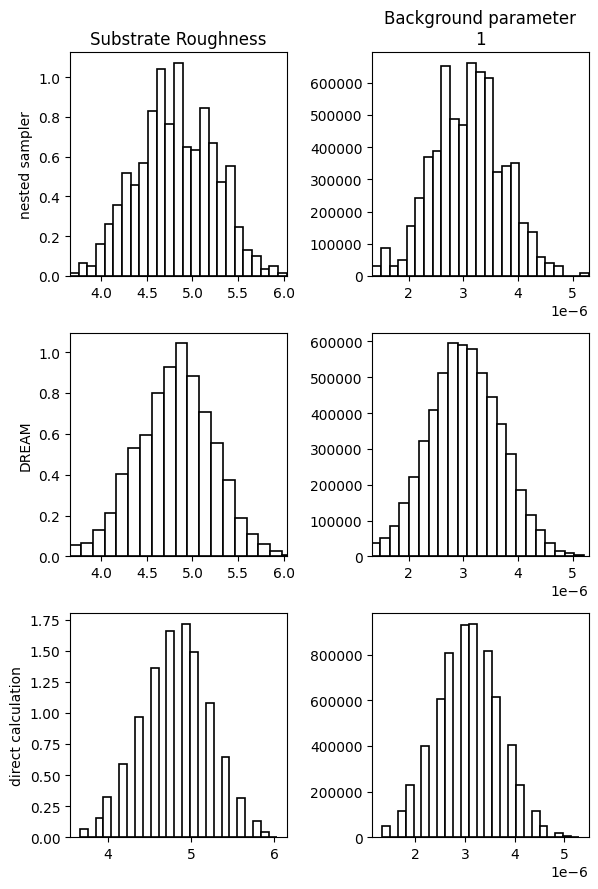

In [6]:
import matplotlib.pyplot as plt
import RATapi.utils.plotting as RATplot

fig, axes = plt.subplots(3, 2, figsize=(6, 9))

# plot NS and DREAM for each parameter
for i in [0, 1]:
    RATplot.plot_one_hist(ns_results, i, axes=axes[0][i])
    RATplot.plot_one_hist(dream_results, i, axes=axes[1][i])
    # we want all 3 plots to have the same x-range
    # so we will use the nested sampler x-range as our base
    axes[1][i].set_xlim(*axes[0][i].get_xlim())
    axes[1][i].set_title("")

# marginalise the probability array to get distributions for each parameter
roughness_distribution = np.sum(probability_array, axis=1)
background_distribution = np.sum(probability_array, axis=0)

axes[2][0].hist(
    roughness,
    bins=25,
    range=axes[0][0].get_xlim(),
    weights=roughness_distribution,
    density=True,
    edgecolor="black",
    linewidth=1.2,
    color="white",
    )

axes[2][1].hist(
    background,
    bins=25,
    range=axes[0][1].get_xlim(),
    weights=background_distribution,
    density=True,
    edgecolor="black",
    linewidth=1.2,
    color="white",
    )

axes[0][0].set_ylabel("nested sampler")
axes[1][0].set_ylabel("DREAM")
axes[2][0].set_ylabel("direct calculation")
fig.tight_layout()

fig.show()

TypeError: 'Axes' object is not subscriptable

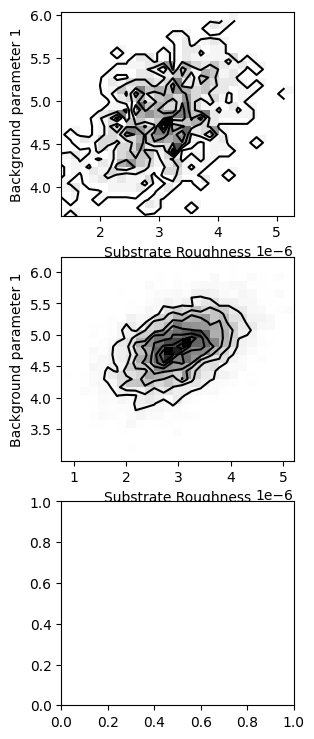

In [8]:
contour_fig, axes = plt.subplots(3, 1, figsize=(3, 9))

# plot NS and DREAM for each parameter
RATplot.plot_contour(ns_results, 0, 1, axes=axes[0])
RATplot.plot_contour(dream_results, 0, 1, axes=axes[1])
# we want all 3 plots to have the same x-range
# so we will use the nested sampler x-range as our base
axes[1].set_xlim(*axes[0][i].get_xlim())
axes[1].set_title("")
